<a href="https://colab.research.google.com/github/starkjiang/TrAC-GNN/blob/main/basic_gnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [1]:
"""Install packages that are required to execute this notebook.
"""
# Install packages. This may take some time.
!pip install torch-scatter~=2.1.0
!pip install torch-sparse~=0.6.16
!pip install torch-cluster~=1.6.0
!pip install torch-spline-conv~=1.2.1
!pip install torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

# Prevent version incompatibility issue.
import functools
import torch
old_load = torch.load
torch.load = functools.partial(old_load, weights_only=False)

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp312-cp312-linux_x86_64.whl size=640889 sha256=ec62b3943a4645a0e4cf2ba42faafe2037764acc2808811479909a7f097efbde
  Stored in directory: /root/.cache/pip/wheels/84/20/50/44800723f57cd798630e77b3ec83bc80bd26a1e3dc3a672ef5
Successfully built torch-scatter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp312-cp312-linux_x86_64.whl size=1158903 sha256=741c487ebbdc6d75c4117b5bdcc2a9fa3559e8ed321d06c4fc2096ab1848eeef
  Stored in directory: /root/.cache/pip/wheels/71/fa/21/bd1d78ce1629aec4ecc924a63b82f6949dda484b6321eac6f2
Successfully built torch-sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  

# Helper Function for Visualization

In [7]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

# Citeseer Dataset

In [8]:
# Use the built-in dataset from PyG.
from torch_geometric.datasets import Planetoid

# Import dataset from PyTorch Geometric
dataset = Planetoid(root=".", name="CiteSeer")

data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Dataset: CiteSeer()
---------------
Number of graphs: 1
Number of features: 3703
Number of classes: 6
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04

Graph:
------
Edges are directed: False
Graph has isolated nodes: True
Graph has loops: False


# Dataframe of Citeseer

In [4]:
# Use CiteSeer dataset from the built-in datasets.
import pandas as pd

dataset = Planetoid(root=".", name="CiteSeer")
data = dataset[0]

df_x = pd.DataFrame(data.x.numpy())
df_x['label'] = pd.DataFrame(data.y)
df_x

,0,1,2,3,4,5,6,7,8,9,...,3694,3695,3696,3697,3698,3699,3700,3701,3702,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# MLP as baseline

We use Multi-layer Perceptron as a baseline model for comparison. Please construct a single hidden layer MLP in the following and train the model.

In [10]:
# Construct an vanilla MLP for classification.
import torch
torch.manual_seed(0)
from torch.nn import Linear
import torch.nn.functional as F


def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)


class MLP(torch.nn.Module):
    """Multilayer Perceptron"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()

        # Initialize the linear layers
        self.linear1 = None
        self.linear2 = None

        # TODO: Define two linear layers
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)



    def forward(self, x):
        # Pass the input through the two linear layers.
        # TODO: Use relu activation (F.relu) to add nonlinearity
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)


        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                          lr=0.01,
                                          weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                   data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(
            out.argmax(dim=1)[data.test_mask], data.y[data.test_mask]
        )
        return acc

# Create MLP model
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

# Train
mlp.fit(data, epochs=300)

# Test
acc = mlp.test(data)
print(f'\nMLP test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=3703, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=6, bias=True)
)
Epoch   0 | Train Loss: 1.799 | Train Acc: 16.67% | Val Loss: 1.78 | Val Acc: 18.80%
Epoch  20 | Train Loss: 0.004 | Train Acc: 100.00% | Val Loss: 1.29 | Val Acc: 53.20%
Epoch  40 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 1.29 | Val Acc: 53.20%
Epoch  60 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.27 | Val Acc: 55.20%
Epoch  80 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.25 | Val Acc: 56.60%
Epoch 100 | Train Loss: 0.006 | Train Acc: 100.00% | Val Loss: 1.22 | Val Acc: 56.80%
Epoch 120 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 57.20%
Epoch 140 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 57.80%
Epoch 160 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 57.20%
Epoch 180 | Train Loss: 0.004 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 57.60%
Epoch

# Create a vanilla GNN layer

In [11]:
# Create a basic GNN layer.
class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        # Neighborhood aggregation through matrix multiplication.
        # TODO: Call the torch.sparese.mm() to calculate.
        x = torch.sparse.mm(adjacency, x)

        # Linear transformation.
        x = self.linear(x)

        return x

# Preprocess the adjacency matrix

In [12]:
# Get the input graph through adjacency.
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency)) # We need to include self-loops.
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

# Create basic GNN model

**Exercise:**

1. Define two GNN layers in the `VanillaGNN` model
2. Establish the whole basic GNN model by leveraging the GNN layers

In [13]:
# Create basic GNN model and then train and test the data.
class VanillaGNN(torch.nn.Module):
    """Vanilla Graph Neural Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()

        # Initialize two GNN layers.
        self.gnn1 = None
        self.gnn2 = None

        # TODO: Create two basic GNN layers through the basic class
        # VanillaGNNLayer.
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        # Pass the input through the two GNN layers.
        # TODO: Follow similarly MLP, define the forward function here for GNN.
        x = self.gnn1(x, adjacency)
        x = F.relu(x)
        x = self.gnn2(x, adjacency)

        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(
            out.argmax(dim=1)[data.test_mask], data.y[data.test_mask]
        )
        return acc

# Creat Basic GNN and Visualize Node Embeddings

We compare the node embeddings from both untrained and trained models.

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=3703, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=6, bias=False)
  )
)


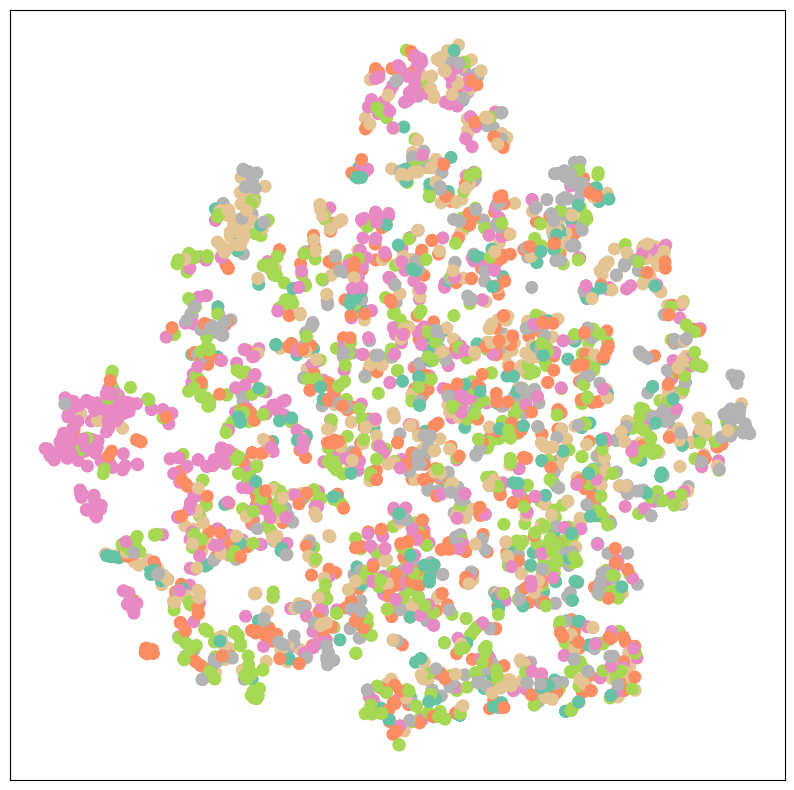

Epoch   0 | Train Loss: 1.834 | Train Acc: 12.50% | Val Loss: 1.81 | Val Acc: 21.60%
Epoch  20 | Train Loss: 0.006 | Train Acc: 100.00% | Val Loss: 2.88 | Val Acc: 60.00%
Epoch  40 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 3.42 | Val Acc: 59.20%
Epoch  60 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 3.27 | Val Acc: 58.40%
Epoch  80 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 3.00 | Val Acc: 59.20%
Epoch 100 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.80 | Val Acc: 59.40%
Epoch 120 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.65 | Val Acc: 59.80%
Epoch 140 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.51 | Val Acc: 59.40%
Epoch 160 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.40 | Val Acc: 60.60%
Epoch 180 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.31 | Val Acc: 61.60%
Epoch 200 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.23 | Val Acc: 61.40%

GNN test accuracy: 61.40%


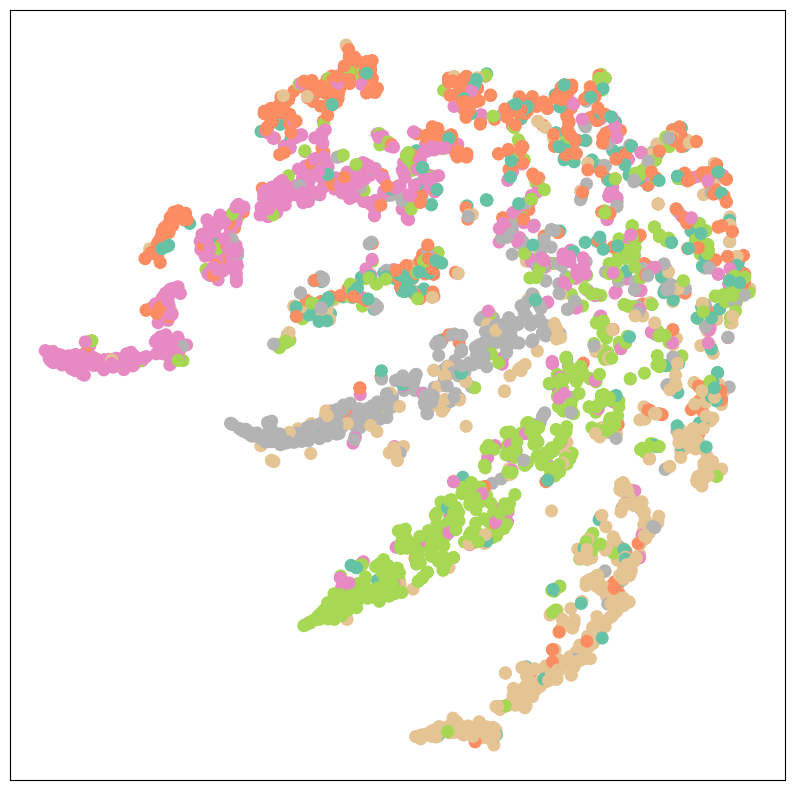

In [14]:
# Create the Vanilla GNN model
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

out = gnn(data.x, adjacency)

# Visualize the node embedding of untrained GNN.
visualize(out, color=data.y)

# Train.
gnn.fit(data, epochs=200)

# Test.
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

# Visualize the output embeddings of the trained model.
out = gnn(data.x, adjacency)
visualize(out, color=data.y)